In [6]:
##Adding imports of MongoClient to create a connection with MongoDB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'work')


In [2]:
from pymongo import MongoClient
from pprintpp import pprint
import warnings
warnings.filterwarnings('ignore')
mongoclient = MongoClient('localhost', 27017)
db = mongoclient.work
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'work')


In [5]:
result = db.newyorktimes.find({},{"_id":0, "author":1}).distinct("author")
pprint(list(result))

[
    u'Dean R Koontz',
    u'Stephenie Meyer',
    u'David Baldacci',
    u'Elizabeth George',
    u'Jimmy Buffett',
    u'Troy Denning',
    u'James Frey',
    u'Garth Stein',
    u'Jeff Shaara',
    u'Debbie Macomber',
    u'Chuck Palahniuk',
    u'Phillip Margolin',
    u"Joseph O'Neill",
    u'Jhumpa Lahiri',
    u'John Grisham',
    u'James Patterson and Gabrielle Charbonnet',
    u'John Sandford',
    u'Emily Giffin',
    u'James Rollins',
    u'Patricia Cornwell',
    u'Laurell K Hamilton',
    u'Steve Martini',
    u'Elizabeth Lowell',
    u'Salman Rushdie',
    u'Lee Child',
    u'Clive Cussler with Jack Du Brul',
    u'Lauren Weisberger',
    u'W E B Griffin and William E Butterworth IV',
    u'Sebastian Faulks',
    u'Alan Furst',
    u'Andre Dubus',
    u'Robert B Parker',
    u'James Patterson and Howard Roughan',
    u'David Wroblewski',
    u'Junot Díaz',
    u'Janet Evanovich',
    u'Jeffery Deaver',
    u'Jackie Collins',
    u'Johanna Lindsey',
    u'Danielle Steel',

In [ ]:
##Using mongo client to sort all data using the field 'weeks_on_list'

In [7]:
result = db.newyorktimes.find({}, {
    "_id":0,
    "weeks_on_list":1,
    "title":1
}).sort("weeks_on_list", 1)
pprint(list(result))

'weeks_on_list': 51},
    {u'title': u'THE GOLDFINCH', u'weeks_on_list': 51},
    {u'title': u'ALL THE LIGHT WE CANNOT SEE', u'weeks_on_list': 51},
    {u'title': u'THE GIRL ON THE TRAIN', u'weeks_on_list': 51},
    {u'title': u'THE NIGHTINGALE', u'weeks_on_list': 51},
    {u'title': u'A GENTLEMAN IN MOSCOW', u'weeks_on_list': 51},
    {u'title': u'THE HOST', u'weeks_on_list': 52},
    {u'title': u'THE HELP', u'weeks_on_list': 52},
    {u'title': u'THE GIRL WHO KICKED THE HORNET’S NEST', u'weeks_on_list': 52},
    {u'title': u'A DANCE WITH DRAGONS', u'weeks_on_list': 52},
    {u'title': u'GONE GIRL', u'weeks_on_list': 52},
    {u'title': u'THE GOLDFINCH', u'weeks_on_list': 52},
    {u'title': u'ALL THE LIGHT WE CANNOT SEE', u'weeks_on_list': 52},
    {u'title': u'THE GIRL ON THE TRAIN', u'weeks_on_list': 52},
    {u'title': u'THE NIGHTINGALE', u'weeks_on_list': 52},
    {u'title': u'A GENTLEMAN IN MOSCOW', u'weeks_on_list': 52},
    {u'title': u'THE HOST', u'weeks_on_list': 53},
    {u

In [ ]:
##Using mongo client to get all titles without duplicates and save them into variable 'result'
##Then create a new empty list
##Then through every title we get the data of: author, weeks_on_list, title and price, once we got that we sorted by 'weeks_on_list' in descending order and get the first position (the position that brings us the number max of weeks on list for that title)
##Finally we save this position into our array 'my_list'

In [39]:
result = db.newyorktimes.find({}, {}).distinct("title")

my_list = []
for r in result:
    a = db.newyorktimes.find({"title":r}, {
        "_id":0,
        "author":1,
        "weeks_on_list":1,
        "title":1,
        "price":1
    }).sort("weeks_on_list", -1).limit(1)

    my_list.append(list(a))

pprint(my_list)

[
    [
        {
            u'author': u'Dean R Koontz',
            u'price': 27,
            u'title': u'ODD HOURS',
            u'weeks_on_list': 6,
        },
    ],
    [
        {
            u'author': u'Stephenie Meyer',
            u'price': {u'$numberDouble': u'25.99'},
            u'title': u'THE HOST',
            u'weeks_on_list': 59,
        },
    ],
    [
        {
            u'author': u'David Baldacci',
            u'price': {u'$numberDouble': u'26.99'},
            u'title': u'THE WHOLE TRUTH',
            u'weeks_on_list': 6,
        },
    ],
    [
        {
            u'author': u'Elizabeth George',
            u'price': {u'$numberDouble': u'27.95'},
            u'title': u'CARELESS IN RED',
            u'weeks_on_list': 4,
        },
    ],
    [
        {
            u'author': u'Jimmy Buffett',
            u'price': {u'$numberDouble': u'21.99'},
            u'title': u'SWINE NOT?',
            u'weeks_on_list': 2,
        },
    ],
    [
        {
         

In [ ]:
##Using mongo client to get all titles without duplicates and save them into variable 'result'
##Then create a new empty list
##Then through every title we get the data of: author, weeks_on_list, title and price, once we got that we sorted by 'price' in descending order and get the first position (the position that brings us the number maximum of price for that title)
##Finally we save this position into our array 'my_list'

In [8]:
result = db.newyorktimes.find({}, {}).distinct("title")

my_list = []
for r in result:
    a = db.newyorktimes.find({"title":r}, {
        "_id":0,
        "author":1,
        "weeks_on_list":1,
        "title":1,
        "price":1
    }).sort("price", -1).limit(1)

    my_list.append(list(a))
    
pprint(len(my_list))

2300


In [ ]:
##Testing mongo client using aggregate
##In the pipeline variable we defined that our _id will be the title and count the quantity of times that title shows up
##It just will add 1 on count if the matches will be more than 1
##Then it sorted by count in decreasing order

In [86]:
pipeline = [
            {"$group": {"_id": "$title", "count": {"$sum": 1}}},
            {"$match": {"count":{"$gt":1}}},
            {"$sort":  {"count": -1}}
]


result = db.newyorktimes.aggregate(pipeline)
list(result)

 6},
 {'_id': 'THE CUBAN AFFAIR', 'count': 6},
 {'_id': 'THE WEIRD SISTERS', 'count': 6},
 {'_id': "THE ALL-GIRL FILLING STATION'S LAST REUNION", 'count': 6},
 {'_id': 'THE WOMEN IN THE CASTLE', 'count': 6},
 {'_id': 'THE DOUBLE COMFORT SAFARI CLUB', 'count': 6},
 {'_id': 'FOOL', 'count': 6},
 {'_id': 'THE SENTRY', 'count': 6},
 {'_id': 'DARK MATTER', 'count': 6},
 {'_id': 'THE LYING GAME', 'count': 6},
 {'_id': 'THE WITNESS', 'count': 6},
 {'_id': 'ROSES', 'count': 6},
 {'_id': 'MISSION TO PARIS', 'count': 6},
 {'_id': "I'VE GOT MY EYES ON YOU", 'count': 6},
 {'_id': 'THE DROP', 'count': 6},
 {'_id': 'ADULTERY', 'count': 6},
 {'_id': 'THE MURDER HOUSE', 'count': 6},
 {'_id': "CALEB'S CROSSING", 'count': 6},
 {'_id': "MILLER'S VALLEY", 'count': 6},
 {'_id': 'NINE DRAGONS', 'count': 6},
 {'_id': 'STAY CLOSE', 'count': 5},
 {'_id': 'THE DISAPPEARED', 'count': 5},
 {'_id': 'THE DUCHESS', 'count': 5},
 {'_id': 'MEDUSA', 'count': 5},
 {'_id': 'FLIRT', 'count': 5},
 {'_id': 'COLD DAYS', 'cou

In [ ]:
##We got all data matched to 'rank=1' and price greater than 0 (not free books)
##And printed just the price ok them
##We added the result variable into 'new_list'
##We created a new list called - list_of_prices
##And added to new_list all the prices
##This way we could calculate the mean, variance, median and standard deviation of all books that are paid

In [192]:
##Getting all data based on rank = 1 and price greater than 0
##Calculating the mean, median, variance and standard deviation
import statistics

result = db.newyorktimes.find({"rank":1, "price": {
    "$gt":0
}}, {"_id":0, "price":1})
new_list = list(res)

list_of_prices = []
for x in range(len(new_list)):
    list_of_prices.append(new_list[x]['price'])

#pprint(list_of_prices)

media = statistics.mean(list_of_prices)
variancia = statistics.variance(list_of_prices)
mediana = statistics.median(list_of_prices)
desvio_padrao = statistics.stdev(list_of_prices)

pprint("Variancia: " + str(variancia))
pprint('Media: ' + str(media))
pprint("Mediana: " + str(mediana))
pprint('Desvio padrão: ' + str(desvio_padrao))


'Variancia: 5.3530424448529415'
'Media: 27.886953124999998'
'Mediana: 27.95'
'Desvio padrão: 2.313664289574644'


In [ ]:
##We got all data matched to rank greater than 1 and price greater than 0 (not free books)
##And save all the prices into new_list
##We created a new list called - list_of_prices
##And added to new_list all the prices
##This way we could calculate the mean, variance, median and standard deviation of all books that are paid and weren't at rank 1

##**We can compare with the results above

In [193]:
import statistics

result = db.newyorktimes.find({"rank": {
    "$gt":1
}, "price": 
    "$gt":0
}}, {"_id":0, "price":1})
new_list = list(res)

#pprint(new_list)

list_of_prices = []
for x in range(len(new_list)):
    list_of_prices.append(new_list[x]['price'])

pprint(len(list_of_prices))

media = statistics.mean(list_of_prices)
variancia = statistics.variance(list_of_prices)
mediana = statistics.median(list_of_prices)
desvio_padrao = statistics.stdev(list_of_prices)

pprint("Variancia: " + str(variancia))
pprint('Media: ' + str(media))
pprint("Mediana: " + str(mediana))
pprint('Desvio padrão: ' + str(desvio_padrao))


3755
'Variancia: 5.6617731275720455'
'Media: 26.931837549933423'
'Mediana: 26.95'
'Desvio padrão: 2.3794480720478113'


In [ ]:
##We get all titles and save them into new_list
##Then we separate every word into list_of_words
##Then we created a dict called unique_list to get unique words
##Then we check how many times the word is used through all titles
##Then we sorted it to check the most commom words

In [4]:
result = db.newyorktimes.find({},{"_id":0, "title":1})
new_list_of_titles = list(result)

#pprint(len(new_list))

list_of_words = []
for x in range(len(new_list_of_titles)):
    for y in new_list_of_titles[x]['title'].split():
        list_of_words.append(y)
        
list_of_unique_words = list(dict.fromkeys(list_of_words))

##Response formed by: word, number of times it appears
response = {}

for u in range(len(list_of_unique_words)):
    counter = 0
    for w in range(len(list_of_words)):
        if(list_of_words[w] == list_of_unique_words[u]):
            counter = counter + 1
            
    response[list_of_unique_words[u]] = counter

response_sort = sorted(response.items(), key = lambda x: x[1])

pprint(response_sort)

    (u'BLINK', 6),
    (u'SILKEN', 6),
    (u'MONEY', 6),
    (u'BED', 6),
    (u'CUSTOMER', 6),
    (u'ALLEGIANCE', 6),
    (u'BURNED', 6),
    (u'TOMORROW', 6),
    (u'ODESSA', 6),
    (u'W', 6),
    (u'LOVERS', 6),
    (u'RULE', 6),
    (u'ELIGIBLE', 6),
    (u'BRIDGE', 6),
    (u'SIXKILL', 6),
    (u'CAME', 6),
    (u'REVERSAL', 6),
    (u'CHIEF', 6),
    (u'FILLING', 6),
    (u'IDENTICAL', 6),
    (u'SEARCH', 6),
    (u'ROSES', 6),
    (u'MUNICH', 6),
    (u'CASTLE', 6),
    (u'CONTACT', 6),
    (u'ANOTHER', 6),
    (u'Y', 6),
    (u'SENTRY', 6),
    (u'TWENTY-FOUR', 6),
    (u'DROP', 6),
    (u'BELONGS', 6),
    (u'SCARECROW', 6),
    (u'MYSELF,', 6),
    (u'SAINT', 6),
    (u'L.A.', 6),
    (u'WASTED', 6),
    (u'AMERICA', 6),
    (u'ELEVENTH', 6),
    (u'TIFFANY’S', 6),
    (u'WISH', 6),
    (u'LAKE', 6),
    (u'SWING', 6),
    (u'PYGMY', 6),
    (u'ANNA', 6),
    (u'GOES', 6),
    (u'WEISSMANNS', 6),
    (u'VINCE', 6),
    (u'RAYLAN', 6),
    (u'LETHAL', 6),
    (u'LILAC', 6),

In [13]:
##Getting all ranks and sorting them on increasing order

result = db.newyorktimes.find({},{"_id":0, "rank":1}).sort("rank", 1)
pprint(list(result))

nk': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
    {u'rank': 18},
  

Text(0,0.5,'apperances')

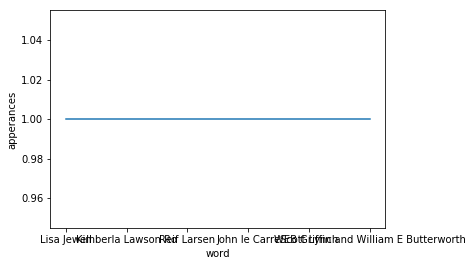

In [9]:
import matplotlib.pyplot as plt

plot_x_list = []
plot_y_list = []

counter = 1
aux = 0
for i in range(25):
    for rs in range(len(response_sort)):
        aux = aux + 1
        if(counter < 7 and len(response_sort[len(response_sort)-aux][0]) > 3):
            plot_x_list.append(response_sort[len(response_sort)-aux][0])
            plot_y_list.append(response_sort[len(response_sort)-aux][1])
            counter = counter + 1



plt.plot(plot_x_list, plot_y_list)
plt.xlabel('word')
plt.ylabel('apperances')

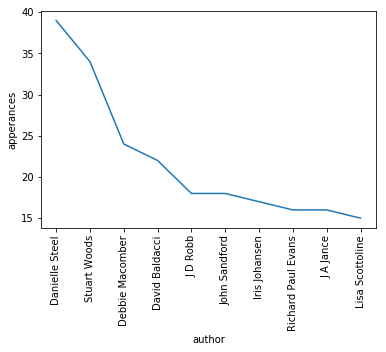

In [19]:
##Check which author have written more bestsellers

pipeline = [
            {"$group": {"_id": "$author", "count": {"$sum": 1}}},
            {"$match": {"count":{"$gt":1}}},
            {"$sort":  {"count": -1}}
]

#result = db.newyorktimes.aggregate(pipeline)
#pprint(list(result))

#res = db.newyorktimes.find({},{"_id":0, "author":1}).distinct("author")
#pprint(len(list(res)))

titles = db.newyorktimes.find({}, {}).distinct("title")

authors_list = []

for t in titles:
    authors = db.newyorktimes.find({"title":t}, {
        "_id":0,
        "author":1
    }).distinct("author")

    authors_list.append(authors[0])

response = {}
for al in authors_list:
    response[al] = authors_list.count(al)

response_sort = sorted(response.items(), key = lambda x: x[1], reverse = True)
#pprint(response_sort)

plot_x_list = []
plot_y_list = []

for r in response_sort:
    if(len(plot_x_list) < 10):
        plot_x_list.append(r[0])
        plot_y_list.append(r[1])
    
plt.xlabel('author')
plt.ylabel('apperances')

plt.xticks(rotation=90)

plt.plot(plot_x_list, plot_y_list)
#pprint(my_list[1])